# k-Means Clustering

### Christian Basso

Here we will explore a class of unsupervised machine learning models: clustering algorithms.
Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as *k-means clustering*, which is implemented in ``sklearn.cluster.KMeans``.

We begin with some imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import preprocessing
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

## Excercise 1: 
Import the Candy data and show the first 10 rows.  Write a dataset description based on the information provided.  

In [2]:
candy = pd.read_csv('/data/cs2300/L5/candy-data.csv', sep=',', quoting=csv.QUOTE_NONE)
candy.head(15)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748
1,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336
2,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556
3,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127,0.034,43.088924
4,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991
5,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
6,Sixlets,1,0,0,0,0,0,0,0,1,0.220,0.081,34.722000
7,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
8,Lemonhead,0,1,0,0,0,0,1,0,0,0.046,0.104,39.141056
9,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865


## Dataset Description
This dataset, courtesy of Walt Hickey, depicts 80 popular candies, some of their characteristics, and their "win-percent". The candy characteristics decribe the taste, sugar, texture, price, and ingredients to not only detirmine what participants look for in a candy, but also help provide clustering attributes. The "win-percent" of each candy comes from random candy vs candy match ups, voted on by 8371 random participants. The win percent simiply desribes how many of these match ups each candy won. Roughly 269,000 matchups were randomly generated for this survey.

## Exercise 2:

Create a scatter plot comparing the price percent and win percent.  Write a few sentences in the reflection below that describes what you observe (are there any obvious groups?).  

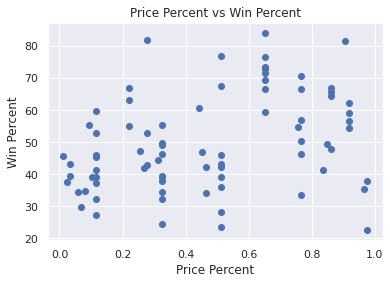

In [3]:
y = candy['winpercent']
x = candy['pricepercent']

plt.ylabel("Win Percent")
plt.xlabel("Price Percent")
plt.title("Price Percent vs Win Percent")
plt.scatter(x, y, alpha=1)
plt.show()

### Reflection
Looking at the scatter plot above, one can see two roughly groups (or clusters!). Visualizing a line that slices the graph from the top left to the bottom right helps define the groups. This data illistrates that most of the cheaper candy lies within a 30% - 55% win percent, while most of the more expensive candy lies within a 50% - 78% win percent. There is a significant over lap within the 50% win percent, but overall, most of the candy with higher win percents are generally more expensive.

## Exercise 3: 
In the following cell, convert the dataframe into a 2D numpy array called ``X`` that only contains numerical data by finding the non-numerical classes and encoding them with numbers. Hint: you can use ``get_dummies`` to make this easier: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [4]:
tdf = pd.get_dummies(candy)
X = tdf.values
tdf.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,...,competitorname_Tootsie Roll Juniors,competitorname_Tootsie Roll Midgies,competitorname_Tootsie Roll Snack Bars,competitorname_Trolli Sour Bites,competitorname_Twix,competitorname_Twizzlers,competitorname_Warheads,competitorname_WelchÕs Fruit Snacks,competitorname_WertherÕs Original Caramel,competitorname_Whoppers
0,1,0,0,0,0,0,0,0,1,0.174,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0.093,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0.732,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0.127,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,1,0.569,...,0,0,0,0,0,0,0,0,0,0


The following code will create a kMeans classifier using the data in ``X``.  Run this cell, and feel free to come back to experiment with different values of k.  You should not need to modify this cell if you completed the previous cell as expected.  

In [13]:
%%time
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

CPU times: user 22.7 ms, sys: 2.95 ms, total: 25.7 ms
Wall time: 24.5 ms


Let's visualize the results by plotting the data colored by these labels.  You should not need to modify this code.  

We will also plot the cluster centers in yellow as determined by the *k*-means estimator:

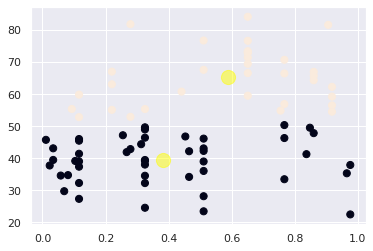

In [6]:

plt.scatter(X[:, 10], X[:, 11], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='yellow', s=200, alpha=0.5);

## Exercise 4:  
This clustering isn't necessarily what you would expect, right?  This is most likely due to scaling bias in the distance calculation.  To address this, we need to scale the axes.  In the following cell, scale values using ``sklearn.preprocessing StandardScaler`` https://scikit-learn.org/stable/modules/preprocessing.html.  You should re-do the clustering and plot the results to compare them to what you generated earlier.  

You should write a few statements in the reflection below about the effect of scaling (you should notice something).  Write a short statement how the ``StandardScaler`` is visually ( no need for documentaion) different from ``scale()`` https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html and what advatages it offers.  

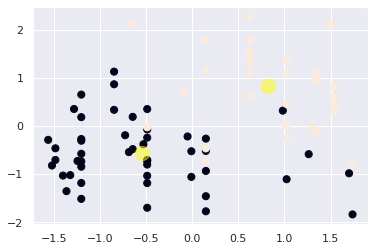

In [7]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

plt.scatter(X_scaled[:, 10], X_scaled[:, 11], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='yellow', s=200, alpha=0.5);

### Reflection 
After scaling the data, one can see that most of the data is correctly grouped based on the two yellow center points. Insead of having a bias based off the x-axis (since the incriments were much larger), the points are evenly biased. However, you may notice that there are a couple points that dont exactly match the groups. This is due to our limited dimensional viewpoints. There are many other attribuetes that impact how data is grouped, and this graph only shows two of them.

## Exercise 5: 
Try three other k values to see how KMeans clusters the data.  Experiment and plot a comparison between two other variables as well.  Document your experiments and write a short description in the reflection section below of what you discovered and whether clusters were more distinct.

3 differnt k values, given plot features

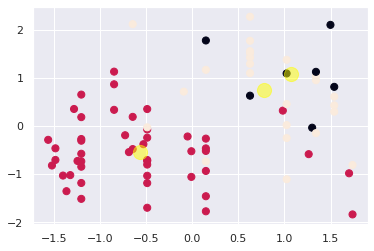

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

plt.scatter(X_scaled[:, 10], X_scaled[:, 11], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='yellow', s=200, alpha=0.5);

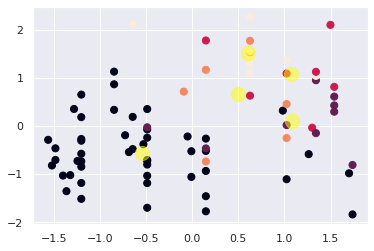

In [9]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

plt.scatter(X_scaled[:, 10], X_scaled[:, 11], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='yellow', s=200, alpha=0.5);

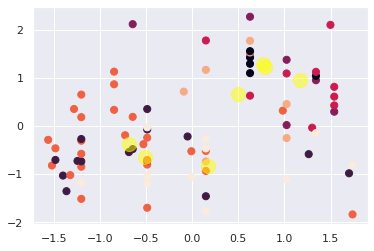

In [10]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

plt.scatter(X_scaled[:, 10], X_scaled[:, 11], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='yellow', s=200, alpha=0.5);

### Reflection
In regard to the varying k values, it is quiet obvious that the grouping gets more chaotic in this 2d view. Again, this data is in a limited view due to the dimentionality of this data set. However, compared to the previous exersise, the k values have been altered. These graphs show k values of 3, 5, and 7. As the k vlaues increase, the data increasingly more "random" in the 2d graph. If we were able to see this data with each variable as an attribute, we may have been able to see more accurate groupings.

## Exercise 6: 
Try changing the features you view in the plot to see how different features are separated. Write a short reflection on what you see in your experiments.  

pick 1 k value, plot 3 differnet sets of features.

The following graphs shows the clusters between three new sets of features with two clusters

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

index for plot from tdf dataframe

### Sugar

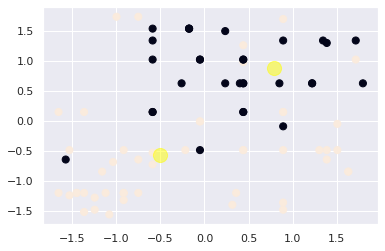

In [12]:
plt.scatter(X_scaled[:, 9], X_scaled[:, 10], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='yellow', s=200, alpha=0.5);

### Price

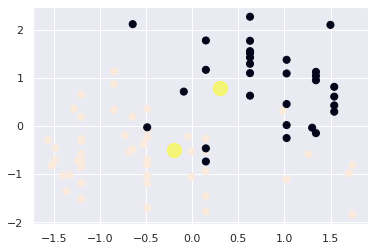

In [13]:
plt.scatter(X_scaled[:, 10], X_scaled[:, 11], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 9], centers[:, 10], c='yellow', s=200, alpha=0.5);

### Fruity 

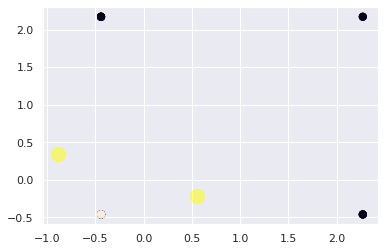

In [14]:
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='yellow', s=200, alpha=0.5);

### Reflection
Looking at these graphs, one can see that changing the feature view changes how points are grouped. In regard to the first two graphs, many of the points changed group. This is because we changed what "angle" we looked at the data from. Looking at the third graph, the fruit column just uses 1s & 0s as yes or no. So, when this column is compared to a numeric column, the plot gets "simple" so to say (as shown above).

If we look at the results, it is clear that the dominant factor for clustering is the win percentage.  

## Exercise 7: 
Scale the percentage down to the same range as the other features using a numpy vectorized single line statement.  Then re-run the clustering to see what affect that has.  You should copy/paste the cluster code from above so you have a duplicated experiment here to make a clean comparison.  Write a short reflection on the effect.  

In [15]:
print(candy['winpercent'].max())
candy['winpercent'] = candy['winpercent'].map(lambda x: x/84.18029)

84.18029


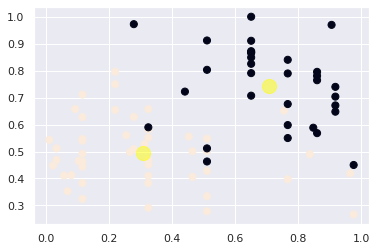

In [16]:
tdf = pd.get_dummies(candy)
X = tdf.values
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 10], X[:, 11], c=y_kmeans, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 10], centers[:, 11], c='yellow', s=200, alpha=0.5);

### Reflection
Looking at all the data, the only column that has data that is greater than one is win percent. To scale this data, we need to find the largest value in the data, and divide all the entire column by this value. In this case it is 84.18029. By doing this we simulate a scaled version of the data since every data value is between 0-1. So, the graph right above looks very similar to the plot of the skmeans scaled data.

## Exercise 8: 
To evaluate the "quality" of clusters, we can look at the "within cluster sum of squares" or inertia.  It is a measure of how coherent the clusters are.  We can look at a variety of k-values to see how the inertia changes for different k-values.  This is not a perfect measure (it is subject to several types of biases), but it can be used to compare different k-values.  

To use the "Elbow Method" you want to find an "elbow" where there is a distinct change in the plot of different k-values.  It is not always very obvious, but this describes what to look for: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/ 

Plot the results using the elbow method for a range of cluster sizes in the following cell.  Calculate the silhouette score and report which k-value is "best" from these results in the reflection below.  Make sure you justify your argument.  

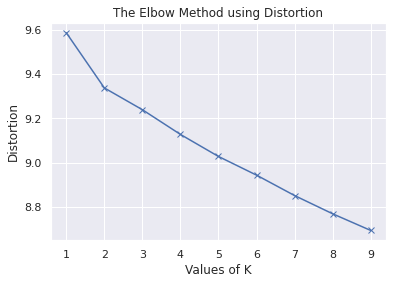

In [17]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
maxk = 10
silhouette = np.zeros(maxk)
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    y = kmeanModel.predict(X_scaled)
  
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    if k > 1:
        silhouette[k] = silhouette_score(X_scaled, y)
    

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Text(0, 0.5, 'silhouette score')

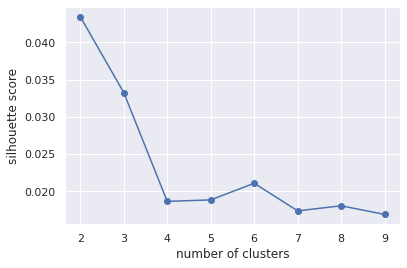

In [18]:
fig, ax = plt.subplots()
ax.plot(range(2,maxk), silhouette[2:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("silhouette score")

### Reflection
We tested our scaled data with k values -9. Looking at our elbow graph, one can see a slight elbow bend at K = 2. Although it may be slight, the bow in the graph at K = 2 represents which k value best fits the data in reagrds to this test. Looking at our silhouette scores, the clusters were "tightest" and most seperated with a K value of 2. With the elbow test and silhouette data, one can say two clusters is best for this dataset.

## Exercise 9

Use kMeans to import and cluster the Milwaukee Home sales dataset using the skills you learned above.  You should not need to re-run any cells above to make your code work, so all of your implementation should be contained in the subsequent cell(s).  

Follow these steps to complete this portion.

1. Import 
2. Convert some categorical columns (of your choosing) to numerical, remove any data that has NaNs.
3. Scale values using ``sklearn.preprocessing StandardScaler`` https://scikit-learn.org/stable/modules/preprocessing.html
4. Determine a good k value using the elbow method
5. Build kMeans model for the value of k you found
6. Plot the clusters for the specific clustering of k you built, make sure you plot the "inverted" values, not the scaled values.  Your plot should have appropriate labels on the axes and a color legend.  
7. Update the features you picked from the original dataset and repeat 2-6
8. Describe what you learned from the analysis about the data.  What do the clusters seem to represent?  

In [19]:
sales = pd.read_csv('/data/cs2300/L5/milwaukee-sales-2021.csv', sep=',')
sales.head(10)

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,868088,Commercial,30171000,9400-9408 N 107TH ST,NaN,9.0,6202.0,Office Building - 1 Story,Concrete Block,1.0,1973.0,NaN,"12,960",6,NaN,0,0,"178,160",3/31/2021,"$450,000"
1,875720,Residential,40012000,9231 W COUNTY LINE RD,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1952.0,4.0,840,1,2.0,1,0,"19,405",9/30/2021,"$180,000"
2,878211,Residential,40067000,9481 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,8.0,"2,000",1,3.0,2,1,"10,607",10/15/2021,"$339,900"
3,875302,Residential,40074000,9579 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2006.0,8.0,"2,115",1,3.0,2,1,"10,607",8/17/2021,"$379,900"
4,865369,Residential,50008000,9239 N BURBANK AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1987.0,5.0,"1,288",1,3.0,2,0,"7,670",2/4/2021,"$195,000"
5,870943,Residential,50043000,9328 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,6.0,"1,505",1,3.0,2,0,"8,878",5/26/2021,"$213,000"
6,872068,Residential,50065000,9267 N BURBANK AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1986.0,5.0,"1,196",1,3.0,1,1,"10,090",6/25/2021,"$170,000"
7,870347,Residential,50110000,8112 W GLENBROOK RD,NaN,9.0,40.0,Ranch,Prem Wood,1.0,1990.0,5.0,"1,246",1,3.0,1,1,"7,200",5/13/2021,"$235,000"
8,874897,Residential,50122000,7926 W GLENBROOK RD,NaN,9.0,40.0,Colonial,Aluminum/Vinyl,2.0,2006.0,8.0,"2,279",1,4.0,2,1,"15,938",7/26/2021,"$370,000"
9,868845,Residential,50153000,8740 W FAIRY CHASM DR,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1951.0,5.0,"1,160",1,3.0,2,0,"8,400",4/23/2021,"$133,000"


In [20]:
sales["Sale_price"] = sales['Sale_price'].map(lambda x: x.lstrip('$'))
sales["Sale_price"] = sales['Sale_price'].map(lambda x: x.replace(',', ''))
sales["Sale_price"] = sales['Sale_price'].map(lambda x: int(x))
#sales["Lotsize"] = sales['Lotsize'].map(lambda x: x.replace(',', ''))
#sales["Lotsize"] = sales['Lotsize'].map(lambda x: int(x))
#convert to int

The next two cells create a full / reduced dataset. The reduced dataset only has price and wall material. This will experiment with one numerical column and one non numerical column to see how the clusters react.

In [21]:
sales_two = pd.DataFrame().assign(Sale_price=sales['Sale_price'], Extwall=sales['Extwall'])
tdf_sales = pd.get_dummies(sales_two, dummy_na=False)
#only use get dummies on non nuneric
X_sales = tdf_sales.values

In [22]:
remove = ['PropertyID', 'taxkey', 'Address', 'CondoProject', 'Year_Built', 'nbhd', 'FinishedSqft']
sales_full = sales.drop(remove, axis = 1)
sales_full = sales_full.dropna()
tdf_sales_full = pd.get_dummies(sales_full, dummy_na=False)
X_sales_full = tdf_sales_full.values

In [23]:
sales_scaler = preprocessing.StandardScaler().fit(X_sales)
sales_scaled = sales_scaler.transform(X_sales)

sales_full_scaler = preprocessing.StandardScaler().fit(X_sales_full)
sales_full_scaled = sales_full_scaler.transform(X_sales_full)

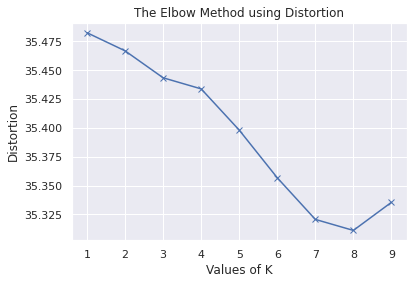

In [24]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(sales_full_scaled)
    kmeanModel.fit(sales_full_scaled)
    y = kmeanModel.predict(sales_full_scaled)
  
    distortions.append(sum(np.min(cdist(sales_full_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / sales_full_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(sales_full_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / sales_full_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_
    

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

You can see that the full data uses a K value of 3.

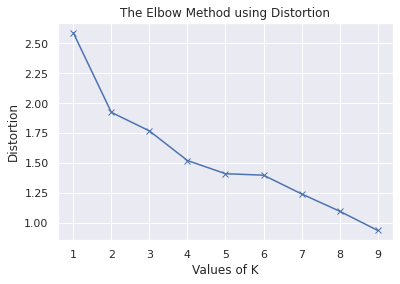

In [25]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(sales_scaled)
    kmeanModel.fit(sales_scaled)
    y = kmeanModel.predict(sales_scaled)
  
    distortions.append(sum(np.min(cdist(sales_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / sales_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(sales_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / sales_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_
    

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

You can see that the limited data also uses a k value of 3. However, we can see that this data has a much softer elbow.

In [26]:
sales_model = KMeans(n_clusters = 3)
y_sales = sales_model.fit_predict(sales_scaled)

sales_full_model = KMeans(n_clusters = 3)
y_full_sales = sales_full_model.fit_predict(sales_full_scaled)

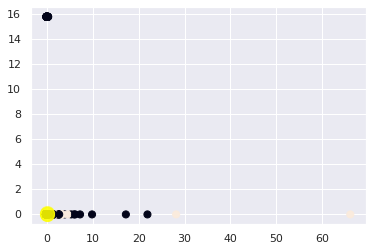

In [27]:
plt.scatter(sales_scaled[:, 0], sales_scaled[:, 1], c=y_sales, s=50)
centers = sales_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

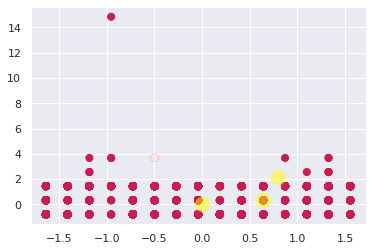

In [28]:
plt.scatter(sales_full_scaled[:, 0], sales_full_scaled[:, 1], c=y_full_sales, s=50)
centers = sales_full_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

Looking at the first plot (reduced data set) there was not many options for Extwall so the data is quite clumped. Looking at the second graph (full dataset) the set looks very uniform. This is probably due to linear columns like year built, stories, and units.

# Example: k-means on images

To start, let's take a look at applying *k*-means on simple handwritten digits images.  Here we will attempt to use *k*-means to try to identify similar digits *without using the original label information*.  We will start by loading the digits and then finding the ``KMeans`` clusters.

The digits data consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.  We start by loading the data

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()

Let's take a look at one of the images.  

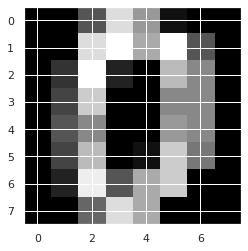

In [30]:
plt.imshow(digits.images[0], cmap='gray')
plt.show()

## Exercise 10:
Write a few lines of code to create a KMeans model using ``digits.data`` and 10 clusters.  No need to plot, just create the clusters for now.  

In [31]:
model = KMeans(n_clusters = 10)
model.fit_predict(digits.data)
print(digits.data.shape)

(1797, 64)


## Question: How many input dimensions exist in this data?  
64

Let's see what the cluster centers look like:

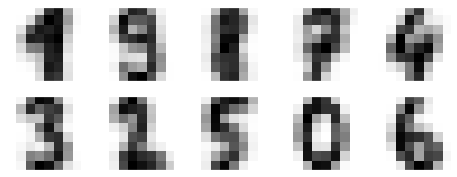

In [32]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = model.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to cluster whose centers are recognizable digits.  

*k*-means knows nothing about the identity of the cluster, so the clusters are not in any specific order.  To identify the actual order, we can use the labels in the following code.  

In [33]:
from scipy.stats import mode
clusters = 10
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

**Dr. Riley, Ive been trying to figure out this error for quite some time. I'm not sure what error it is. I've traced it down to the variable "clusters" that was in the pre-written code. It is never declared and I do not know what should go there, I tried to put in the number of clusters (10), the model, the data, but it all leads back to this same error. This also breaks the next cell. In the next exersise, I used an alternate method of taking accuracy**

With just a simple *k*-means algorithm, we discovered the correct grouping for 80% of the input digits!
Let's check the confusion matrix for this:

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!


## Exercise 11:
Let's try this with higher resolution images!  Use the code below to import the 28x28 DIGITS images.  

Then complete the following steps:
1. Plot an example image 
2. Train a KMeans cluster using the testing data.  Note that you will need to reshape the data to be in the correct format. (1d array)    make look like ex 10
3. Plot the cluster centers
4. Calculate the accuracy
5. Plot the confusion matrix
6. Use the training data and re-run the experiment to see how sensitive the model is to the data.  
7. Write a short reflection on what you observed from this and why it might be the case.  

In [36]:
import tensorflow as tf
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

2023-01-16 23:27:27.617541: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### Test Data

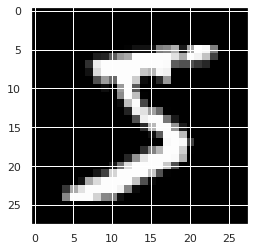

In [37]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [38]:
print(X_test.shape)

(10000, 28, 28)


#### Reshape data

In [39]:
X_train_flat = X_train.reshape(60000, 28*28)
X_test_flat = X_test.reshape(10000, 28*28)

#### Make model

In [40]:
hd_model = KMeans(n_clusters = 10)
hd_model.fit_predict(X_test_flat)

array([5, 4, 1, ..., 5, 5, 6], dtype=int32)

#### Plot centers

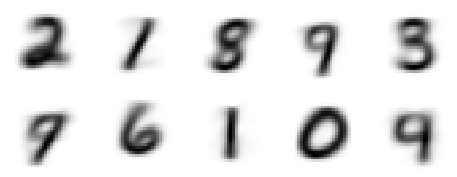

In [41]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = hd_model.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [42]:
cluster_labels = hd_model.labels_
print(cluster_labels)

[5 4 1 ... 5 5 6]


#### Get labels and compare to real labels

In [43]:
reference_labels = {}
# For loop to run through each label of cluster label
for i in range(len(np.unique(hd_model.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_test[index==1]).argmax()
    reference_labels[i] = num
print(reference_labels)

{0: 2, 1: 1, 2: 8, 3: 7, 4: 3, 5: 7, 6: 6, 7: 1, 8: 0, 9: 4}


In [44]:
number_labels = np.random.rand(len(hd_model.labels_))
for i in range(len(hd_model.labels_)):
    number_labels[i] = reference_labels[hd_model.labels_[i]]

#### Accuracy and confusion matrix

In [45]:
from sklearn.metrics import accuracy_score
print("Test model accuracy: " + str(accuracy_score(number_labels,y_test)))


Test model accuracy: 0.5889


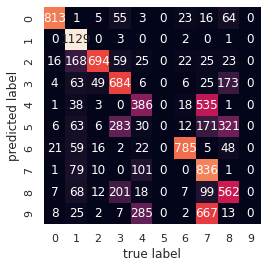

In [46]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(number_labels,y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Training Data

Test model accuracy: 0.5829166666666666


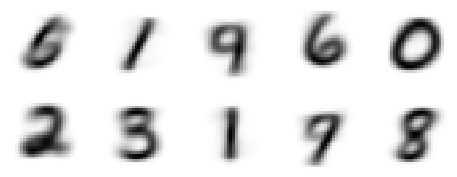

In [47]:
hd_model2 = KMeans(n_clusters = 10)
hd_model2.fit_predict(X_train_flat)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = hd_model2.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    
cluster_labels = hd_model2.labels_

reference_labels2 = {}
# For loop to run through each label of cluster label
for i in range(len(np.unique(hd_model2.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num

number_labels = np.random.rand(len(hd_model2.labels_))
for i in range(len(hd_model2.labels_)):
    number_labels[i] = reference_labels[hd_model2.labels_[i]]
    
from sklearn.metrics import accuracy_score
print("Test model accuracy: " + str(accuracy_score(number_labels,y_train)))

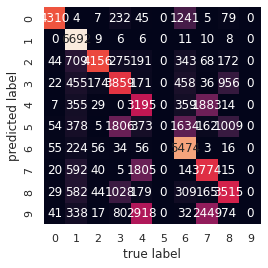

In [48]:
mat = confusion_matrix(number_labels,y_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Reflection
Looking at the two accuracy scores, the testing data had an accuracy score of 0.5922 and the training data had an accuracy score of 0.5907. I expected the full training set to have a higher score than that of the smaller testing set. However, the training data had roughy the same accuracy (off by .002, these numbers change every time the model is run). This can be explained by the training model overfitting. It was memorizing the data after it saw the same data clusters so many times. If we were to stop the model before it was done, this could be avoided.